In [1]:
import cogent3
from cogent3 import get_app
import matplotlib.pyplot as plt
import paths
import libs

In [10]:
#Define apps
loader = get_app("load_aligned", moltype="dna")   
omit_degs_cds = get_app("omit_degenerates", moltype="dna", motif_length=3)
omit_degs_noncds1 = get_app("omit_degenerates", moltype="dna")
omit_degs_noncds2 = get_app("omit_degenerates", moltype="dna")
rename_cds = libs.renamer_cds_aligned()
rename_noncds = libs.renamer_noncds_aligned()
ffold = get_app("take_codon_positions", fourfold_degenerate=True)
concat = get_app("concat", moltype="dna")

# CDS

In [18]:
folder_in = paths.DATA_APES114 + 'cds/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

#create a concatenated alignment with all coding positions
ffold_process = loader + omit_degs_cds + rename_cds + ffold
# result below is only valid alignments (no NotCompleted).
results_ffold = [r for r in ffold_process.as_completed(in_dstore[:], parallel=True) if r]
ffold_alns = concat(results_ffold)
ffold_alns.source = "cds"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_ffold = sm(ffold_alns)
print("Model results : \n" + str(result_ffold.lf) + "\n")

humanENS_ffold = lengthstree_ffold["Human"]

dp_ffold = ffold_alns.dotplot("HairyArma", "RoundEare")
dp_ffold.show()

Directory datastore
record type      number
-----------------------
completed           396
not_completed         0
logs                  1
-----------------------


   0%|          |00:00<?

Exception ignored in: <function tqdm.__del__ at 0x7f6ba5e76fc0>
Traceback (most recent call last):
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/std.py", line 1148, in __del__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 282, in close
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/tqdm/notebook.py", line 171, in display
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 716, in __set__
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 706, in set
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/traitlets/traitlets.py", line 1513, in _notify_trait
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/site-packages/ipywidgets/widgets/widget.py", line 700, in notify_change
  File "/home/u12/uliseshmc/.conda/envs/delme/lib/python3.13/si

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -45816.4312
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Gorilla       root        0.01    0.95    3.17    0.42    0.73    0.92
Chimpanzee    root        0.01    0.96    7.97    1.49    1.59    1.53
Human         root        0.01    1.09    4.39    0.26    0.58    0.88
----------------------------------------------------------------------

continued: 
  C>T      G>A     G>C     G>T     T>A      T>C
-----------------------------------------------
 4.53     5.64    1.27    0.41    0.49     4.27
12.90    15.42    1.27    1.90    0.00    10.17
 6.87     8.37    1.28    0.72    0.24     2.88
-----------------------------------------------

   A       C       G       T
----------------------------
0.14    0.39    0.32    0.15
----------------------------



ValueError: HairyArma, RoundEare missing

# CDS codon aligned

In [4]:
omit_degs_cds.disconnect()
ffold.disconnect()

folder_in = paths.DATA_APES114 + 'cds/codon_aligned/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')
#create a concatenated alignment with all coding positions
ffold_codonalignedprocess = loader+omit_degs_cds+ffold
# result below is only valid alignments (no NotCompleted).
results_ffold = [r for r in ffold_codonalignedprocess.as_completed(in_dstore[:], parallel=True) if r]
ffold_alns = concat(results_ffold)
ffold_alns.source = "cds_codonaligned"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_ffold_codonaligned = sm(ffold_alns)
print("Model results : \n" + str(result_ffold_codonaligned.lf) + "\n")

print("Distances: ")
lengthstree_ffold_codonaligned = result_ffold_codonaligned.lf.get_lengths_as_ens()
humanENS_ffold_codonaligned = lengthstree_ffold_codonaligned["Human"]
print(lengthstree_ffold_codonaligned)

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -131955.0316
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Gorilla       root        0.01    0.79    4.67    0.51    0.74    1.09
Chimpanzee    root        0.01    1.54    5.64    1.03    1.09    1.90
Human         root        0.01    1.06    4.01    0.39    0.78    0.97
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
4.15    5.22    1.43    0.90    0.39    4.05
8.29    9.78    1.50    1.71    1.00    6.22
5.22    6.17    1.18    0.84    0.31    2.71
--------------------------------------------

   A       C       G       T
----------------------------
0.15    0.38    0.31    0.16
----------------------------

Distances: 
{'Gorilla': np.float64(0.014230382949841911), 'Chimpanzee': np.float64(0.0081458

# Introns

In [8]:
folder_in = paths.DATA_APES114 + 'introns/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

#create a concatenated alignment with all coding positions
noncds_process = loader + omit_degs_noncds1 + rename_noncds
# result below is only valid alignments (no NotCompleted).
results_allpos = [r for r in noncds_process.as_completed(in_dstore[:], parallel=True) if r]
allpos_alns = concat(results_allpos)
allpos_alns.source = "introns"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_introns = sm(allpos_alns)
print("Model results : \n" + str(result_introns.lf) + "\n")

print("Distances: ")
lengthstree_introns = result_introns.lf.get_lengths_as_ens()
humanENS_introns = lengthstree_introns["Human"]
print(lengthstree_introns)

Directory datastore
record type      number
-----------------------
completed           543
not_completed         0
logs                  1
-----------------------


   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -10543588.5646
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Gorilla       root        0.01    1.01    4.67    0.64    1.17    1.64
Chimpanzee    root        0.01    0.98    3.66    0.61    1.02    1.51
Human         root        0.01    1.03    4.06    0.60    1.16    1.52
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.45    6.52    1.65    1.16    0.65    4.58
6.01    6.10    1.39    1.03    0.60    3.43
6.76    6.79    1.55    1.20    0.59    4.01
--------------------------------------------

   A       C       G       T
----------------------------
0.25    0.25    0.25    0.25
----------------------------

Distances: 
{'Gorilla': np.float64(0.009924373773027871), 'Chimpanzee': np.float64(0.00606

# Introns nucleotide aligned

In [11]:
folder_in = paths.DATA_APES114 + 'introns/nt_aligned/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')
#create a concatenated alignment with all coding positions
noncds_process_ntaligned = loader + omit_degs_noncds2
# result below is only valid alignments (no NotCompleted).
results_allpos = [r for r in noncds_process_ntaligned.as_completed(in_dstore[:], parallel=True) if r]
allpos_alns = concat(results_allpos)
allpos_alns.source = "introns_ntaligned"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_introns_ntaligned = sm(allpos_alns)
print("Model results : \n" + str(result_introns_ntaligned.lf) + "\n")

print("Distances: ")
lengthstree_introns_ntaligned = result_introns_ntaligned.lf.get_lengths_as_ens()
humanENS_introns_ntaligned = lengthstree_introns_ntaligned["Human"]
print(lengthstree_introns_ntaligned)

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -9250412.3019
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Gorilla       root        0.02    0.93    2.15    0.92    0.93    1.06
Chimpanzee    root        0.01    1.00    2.12    1.05    1.09    1.17
Human         root        0.01    0.99    2.39    0.93    0.96    1.13
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
2.59    2.66    1.09    0.99    1.00    2.15
3.11    3.17    1.17    1.17    0.99    2.01
3.52    3.52    1.15    0.99    0.90    2.43
--------------------------------------------

   A       C       G       T
----------------------------
0.24    0.26    0.26    0.24
----------------------------

Distances: 
{'Gorilla': np.float64(0.019882298378948504), 'Chimpanzee': np.float64(0.012160

# Introns AR

In [13]:
folder_in = paths.DATA_APES114 + 'intronsAR/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')

# result below is only valid alignments (no NotCompleted).
results_allpos = [r for r in noncds_process.as_completed(in_dstore[:], parallel=True) if r]
allpos_alns = concat(results_allpos)
allpos_alns.source = "intronsAR"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intronsAR = sm(allpos_alns)
print("Model results : \n" + str(result_intronsAR.lf) + "\n")

print("Distances: ")
lengthstree_intronsAR = result_intronsAR.lf.get_lengths_as_ens()
humanENS_intronsAR = lengthstree_intronsAR["Human"]
print(lengthstree_intronsAR)

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -8471315.4296
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Gorilla       root        0.01    0.99    4.45    0.80    1.21    1.46
Chimpanzee    root        0.01    1.06    3.64    0.87    1.16    1.42
Human         root        0.01    0.99    3.83    0.71    1.21    1.50
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
6.77    6.95    1.43    1.16    0.78    4.33
7.40    7.40    1.36    1.21    0.81    3.51
7.53    7.70    1.35    1.25    0.72    3.84
--------------------------------------------

   A       C       G       T
----------------------------
0.26    0.24    0.24    0.26
----------------------------

Distances: 
{'Gorilla': np.float64(0.012073281000994442), 'Chimpanzee': np.float64(0.007186

In [15]:
folder_in = paths.DATA_APES114 + 'intronsAR/nt_aligned/'
in_dstore = cogent3.open_data_store(folder_in, suffix='fa', mode='r')
# result below is only valid alignments (no NotCompleted).
results_allpos = [r for r in noncds_process_ntaligned.as_completed(in_dstore[:], parallel=True) if r]
allpos_alns = concat(results_allpos)
allpos_alns.source = "intronsAR_ntaligned"

#Do a General nucleotide substitution model
#time_het=max sets a 36 params substitution model
sm = get_app("model", "GN", time_het="max", optimise_motif_probs=True, show_progress=True)
result_intronsAR_ntaligned = sm(allpos_alns)
print("Model results : \n" + str(result_intronsAR_ntaligned.lf) + "\n")

print("Distances: ")
lengthstree_intronsAR_ntaligned = result_intronsAR_ntaligned.lf.get_lengths_as_ens()
humanENS_intronsAR_ntaligned = lengthstree_intronsAR_ntaligned["Human"]
print(lengthstree_intronsAR_ntaligned)

   0%|          |00:00<?

   0%|          |00:00<?

   0%|          |00:00<?

Model results : 
GN
log-likelihood = -8240427.7037
number of free parameters = 39
edge          parent    length     A>C     A>G     A>T     C>A     C>G
----------------------------------------------------------------------
Gorilla       root        0.03    1.00    2.20    1.16    1.17    1.05
Chimpanzee    root        0.02    1.13    2.13    1.17    1.14    1.13
Human         root        0.01    1.01    2.61    1.09    1.08    1.11
----------------------------------------------------------------------

continued: 
 C>T     G>A     G>C     G>T     T>A     T>C
--------------------------------------------
2.97    3.02    1.03    1.11    1.17    2.14
3.34    3.28    1.19    1.19    1.04    2.03
4.37    4.44    1.08    1.16    0.99    2.54
--------------------------------------------

   A       C       G       T
----------------------------
0.26    0.24    0.24    0.26
----------------------------

Distances: 
{'Gorilla': np.float64(0.026629306474259738), 'Chimpanzee': np.float64(0.015365

# Plotting

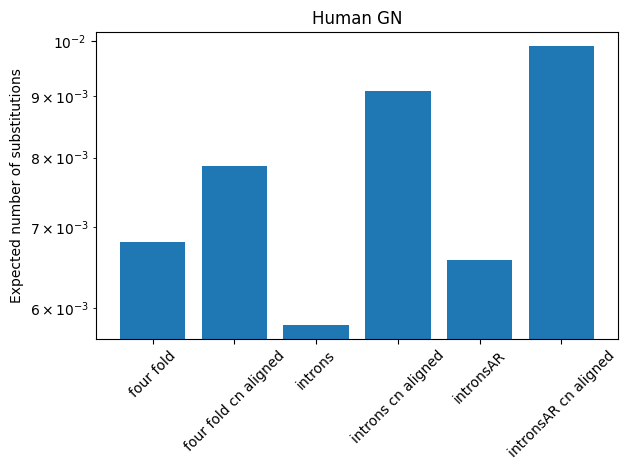

{'four fold': np.float64(0.006807116819923458), 'four fold cn aligned': np.float64(0.00786603737688505), 'introns': np.float64(0.005807745633965639), 'introns cn aligned': np.float64(0.00909261444635818), 'intronsAR': np.float64(0.006579165144013552), 'intronsAR cn aligned': np.float64(0.009898557019704138)}


In [17]:
ENS_human = {
    "four fold": humanENS_ffold,
    "four fold cn aligned": humanENS_ffold_codonaligned,
    "introns": humanENS_introns,
    "introns cn aligned": humanENS_introns_ntaligned,
    "intronsAR": humanENS_intronsAR,
    "intronsAR cn aligned": humanENS_intronsAR_ntaligned
}


plt.figure()
plt.bar(ENS_human.keys(), ENS_human.values())
plt.yscale("log")
plt.ylabel("Expected number of substitutions")
plt.title("Human GN")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(ENS_human)